Делаем сначала топик моделлинг

In [1]:
from pprint import pprint
from tqdm.auto import tqdm
from string import punctuation
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymystem3 import Mystem
import gensim
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
import matplotlib.colors as mcolors

m = Mystem()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~—…«»'
sw = stopwords.words('russian')
with open('okolonolya.txt', 'r', encoding='utf-8') as f:
    booktext = f.read()
    
booktext = sent_tokenize(booktext)

for i in range(len(booktext)):
    booktext[i] = booktext[i].replace('\n', ' ')
    booktext[i] = booktext[i].lower()
    for s in punct:
        booktext[i] = booktext[i].replace(s, '')
    booktext[i] = booktext[i].replace('-', ' ')
    booktext[i] = m.lemmatize(booktext[i])

with open('okolonolya_lems.txt', 'w', encoding='utf-8') as f:
    for i in booktext:
        for j in i:
            if j not in sw:
                f.write(j)

with open('okolonolya_lems.txt', 'r', encoding='utf-8') as f:
    booktext = f.read()
    
booktext = re.sub(' +', ' ', booktext)
booktext = booktext.strip()

with open('okolonolya_lems.txt', 'w', encoding='utf-8') as f:
    f.write(booktext)
dataset = []
sw = stopwords.words('russian')
with open('okolonolya_lems.txt', 'r', encoding='utf-8') as f:
    text = f.read()
dataset = [d.split() for d in text.split()]
id2word = gensim.corpora.Dictionary(dataset)
corpus = [id2word.doc2bow(text) for text in dataset]
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,  
    id2word=id2word,
    num_topics=4,  
    random_state=100,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='symmetric',
    iterations=100,
    per_word_topics=True
)

pprint(lda_model.print_topics())



[(0,
  '0.063*"егор" + 0.017*"сделать" + 0.016*"принц" + 0.016*"33" + '
  '0.015*"узнавать" + 0.015*"свет" + 0.014*"википедия" + 0.012*"живой" + '
  '0.011*"свой" + 0.010*"честь"'),
 (1,
  '0.020*"вариант" + 0.017*"который" + 0.017*"губка" + 0.016*"принимать" + '
  '0.014*"убивать" + 0.010*"кровать" + 0.010*"настя" + 0.009*"становиться" + '
  '0.008*"никелодеон" + 0.007*"время"'),
 (2,
  '0.031*"это" + 0.023*"альберт" + 0.020*"весь" + 0.018*"плакса" + 0.013*"см" '
  '+ 0.013*"слово" + 0.011*"насилие" + 0.011*"взять" + 0.008*"смерть" + '
  '0.008*"встречать"'),
 (3,
  '0.014*"книга" + 0.013*"делать" + 0.012*"иванович" + 0.010*"лолита" + '
  '0.009*"значение" + 0.009*"входить" + 0.008*"остынуть" + 0.008*"край" + '
  '0.008*"кириллович" + 0.007*"пистолет"')]


Потом строим график

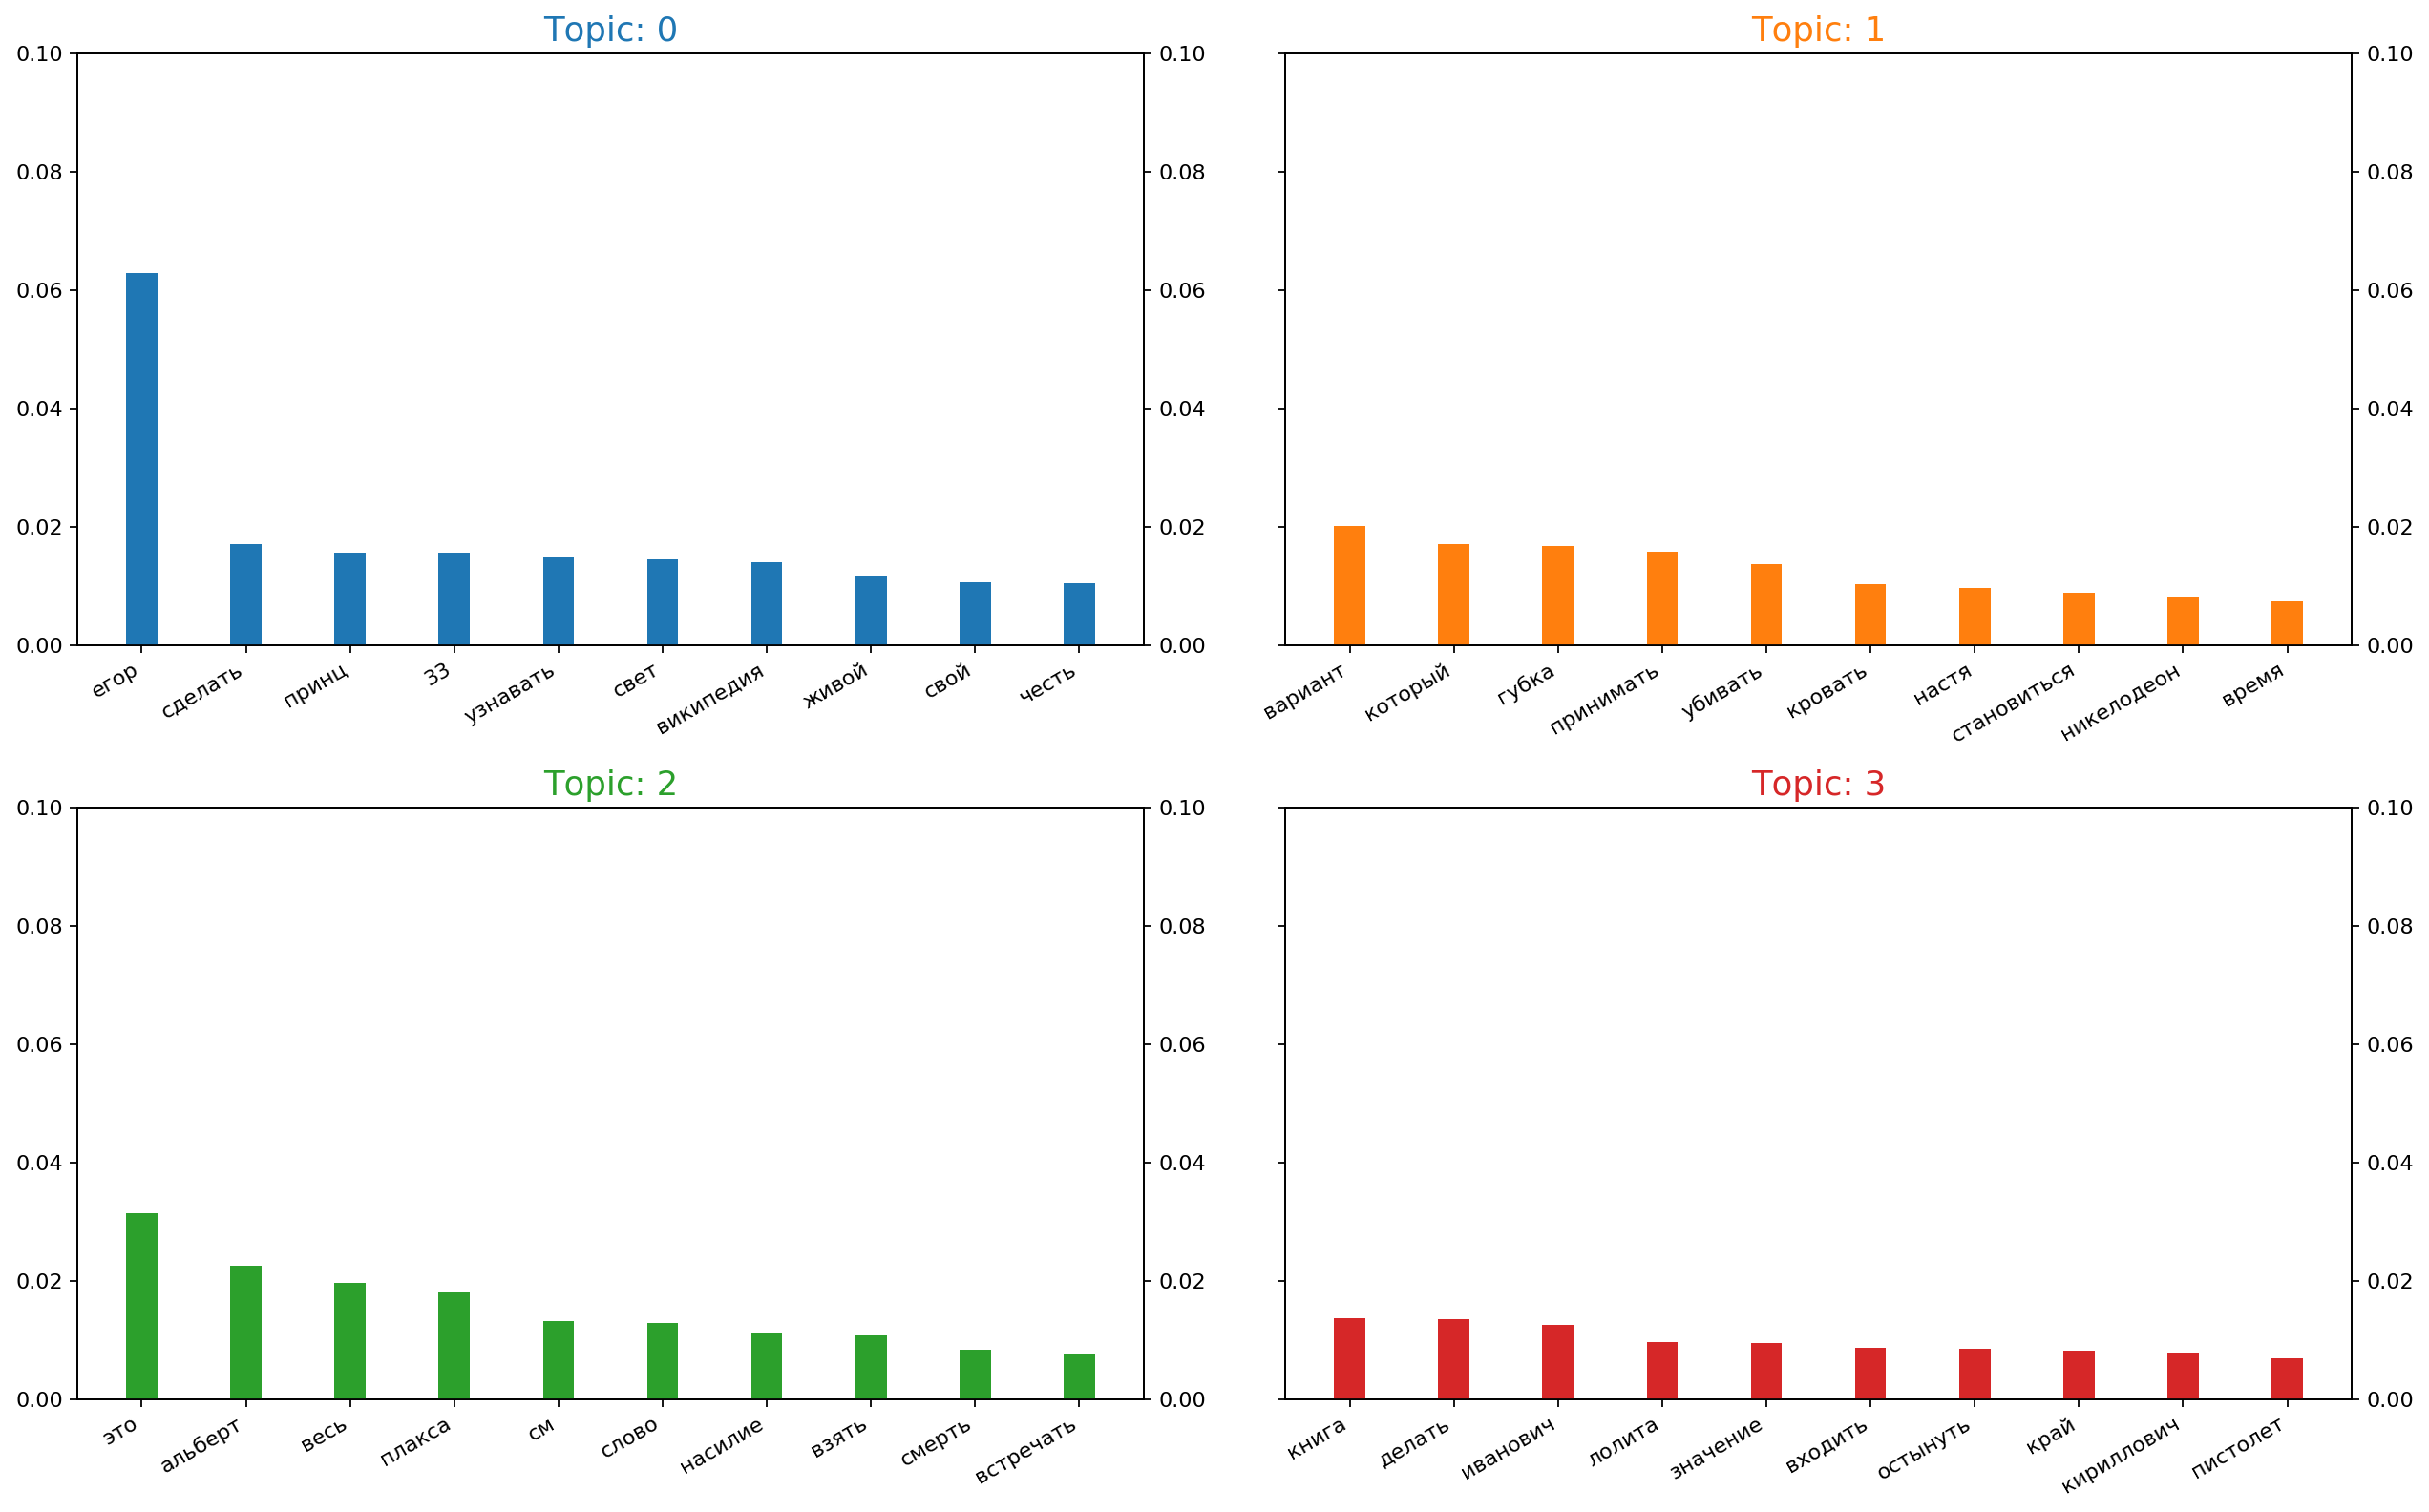

In [2]:
data_ready = list(text)
topics = lda_model.show_topics(formatted=False)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])        

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i], color=cols[i], width = 0.3)
    ax_twin.set_ylim(0, 0.100); ax.set_ylim(0, 0.100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
 

fig.tight_layout(w_pad=2)     
plt.savefig('fig_model.png')